# Применение цветовых пространств для фильтрации

 В прошлый раз мы не рассмотрели цветовое пространство HSV, которое расшифровывается как:

- **H**ue - цветовой тон, значение от 0 до 360
- **S**aturation - насыщенность, измеряется в процентах. Чем больше этот параметр, тем «чище» цвет, поэтому этот параметр иногда называют чистотой цвета. А чем ближе этот параметр к нулю, тем ближе цвет к нейтральному серому.
- **V**alue -  значение цвета, или **B**rightness — яркость. Также, как и в насыщенности, измеряется в процентах


![Alt Text](https://www.mathworks.com/help/images/hsvcone.gif)

HSV считается более приближенной к человеческому глазу моделью цвета, чем RGB или YUV.


In [8]:
!wget https://raw.githubusercontent.com/CHEREF-Mehdi/SkinDetection/refs/heads/master/Image/HGR1/5/K_P_hgr1_id08_2.jpg
!wget https://raw.githubusercontent.com/CHEREF-Mehdi/SkinDetection/refs/heads/master/Image/HGR2a/1/B_P_hgr2A2_id01_2.jpg
!wget https://raw.githubusercontent.com/CHEREF-Mehdi/SkinDetection/refs/heads/master/Image/HGR1/3/E_P_hgr1_id03_6.jpg

--2025-10-22 23:58:59--  https://raw.githubusercontent.com/CHEREF-Mehdi/SkinDetection/refs/heads/master/Image/HGR1/5/K_P_hgr1_id08_2.jpg
Loaded CA certificate '/etc/ssl/certs/ca-certificates.crt'
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 66017 (64K) [image/jpeg]
Saving to: ‘K_P_hgr1_id08_2.jpg’

K_P_hgr1_id08_2.jpg 100%[===================>]  64.47K  --.-KB/s    in 0.06s   

2025-10-22 23:59:00 (1.12 MB/s) - ‘K_P_hgr1_id08_2.jpg’ saved [66017/66017]

--2025-10-22 23:59:00--  https://raw.githubusercontent.com/CHEREF-Mehdi/SkinDetection/refs/heads/master/Image/HGR2a/1/B_P_hgr2A2_id01_2.jpg
Loaded CA certificate '/etc/ssl/certs/ca-certificates.crt'
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199

Пример по поиску предметов определенного цвета

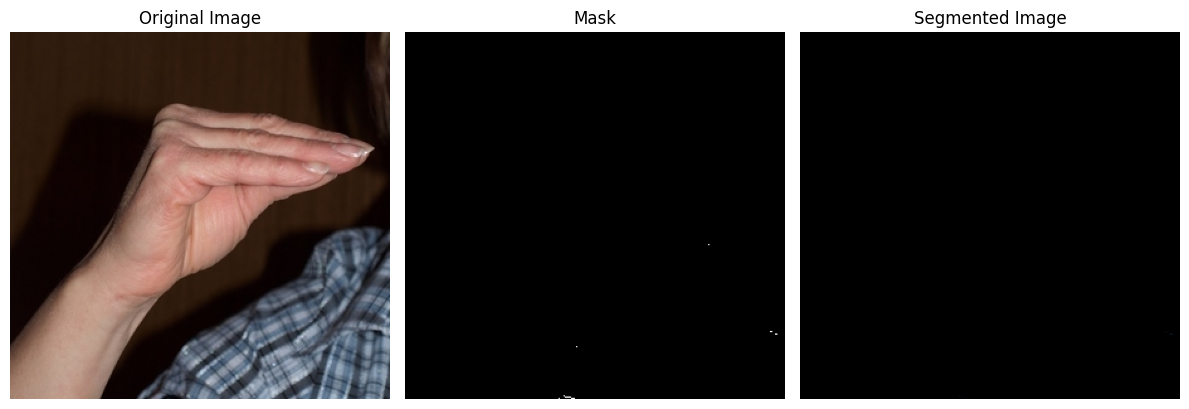

In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Function to perform color segmentation
def segment_color(image, lower_bound, upper_bound):
    # Convert the image to HSV color space
    hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    # Create a mask for the specified color range
    mask = cv2.inRange(hsv_image, lower_bound, upper_bound)

    # Bitwise-AND mask and original image
    segmented_image = cv2.bitwise_and(image, image, mask=mask)

    return mask, segmented_image

# Load the image
image = cv2.imread('E_P_hgr1_id03_6.jpg')  # Replace with your image path

# Define the HSV range for the color you want to segment (e.g., blue)
lower_blue = np.array([100, 150, 0])   # Lower bound for blue
upper_blue = np.array([140, 255, 255]) # Upper bound for blue

# Perform color segmentation
mask, segmented_image = segment_color(image, lower_blue, upper_blue)

# Display the results
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.title('Original Image')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title('Mask')
plt.imshow(mask, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title('Segmented Image')
plt.imshow(cv2.cvtColor(segmented_image, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.tight_layout()
plt.show()

In [10]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
#Open a simple image
img=cv2.imread("B_P_hgr2A2_id01_2.jpg")

#converting from gbr to hsv color space
img_HSV = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
# Пороги по обнаружению кожи
HSV_mask = cv2.inRange(img_HSV, (0, 15, 0), (17,170,255))
# Удаляем шум через морфологическую операцию, разберем подробнее в следущий раз...
HSV_mask = cv2.morphologyEx(HSV_mask, cv2.MORPH_OPEN, np.ones((3,3), np.uint8))

#converting from gbr to YCbCr color space
img_YCrCb = cv2.cvtColor(img, cv2.COLOR_BGR2YCrCb)
#skin color range for hsv color space
YCrCb_mask = cv2.inRange(img_YCrCb, (0, 135, 85), (255,180,135))
YCrCb_mask = cv2.morphologyEx(YCrCb_mask, cv2.MORPH_OPEN, np.ones((3,3), np.uint8))

#merge skin detection (YCbCr and hsv)
global_mask=cv2.bitwise_and(YCrCb_mask,HSV_mask)
global_mask=cv2.medianBlur(global_mask,3)
global_mask = cv2.morphologyEx(global_mask, cv2.MORPH_OPEN, np.ones((4,4), np.uint8))


HSV_result =cv2.bitwise_and(img, img, mask=HSV_mask)# cv2.bitwise_not(HSV_mask)
YCrCb_result = cv2.bitwise_and(img, img, mask=YCrCb_mask)
global_result=cv2.bitwise_and(img, img, mask=global_mask)

img = cv2.resize(img, (640, 480))
HSV_result = cv2.resize(HSV_result, (640, 480))
YCrCb_result = cv2.resize(YCrCb_result, (640, 480))
global_result = cv2.resize(global_result, (640, 480))

ModuleNotFoundError: No module named 'google'

In [ ]:
cv2_imshow(img)

In [ ]:
cv2_imshow(HSV_result)

In [ ]:
cv2_imshow(YCrCb_result)


In [ ]:
cv2_imshow(global_result)

Попробуем нарисовать границы объектов:

In [ ]:
from copy import deepcopy


img_ = deepcopy(img)

# Threshold the image for object detection
_, thresh_img = cv2.threshold(img_, 100, 255, cv2.THRESH_BINARY)
cv2_imshow(thresh_img)

In [ ]:
# Find contours of objects
channel = 0
draw_color = [0,0,0]
draw_color[channel] = 255
contours, _ = cv2.findContours(thresh_img[:,:,channel], cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Draw detected contours on the original image
cv2.drawContours(img_, contours, -1, tuple(draw_color), 3)

plt.imshow(img_)

In [ ]:
img_ = deepcopy(img)
# Convert to grayscale
gray_img = cv2.cvtColor(img_, cv2.COLOR_BGR2GRAY)

cv2_imshow(gray_img)

hsv_img = cv2.cvtColor(img_, cv2.COLOR_BGR2HSV)
cv2_imshow(hsv_img)


In [ ]:
# Threshold the image for object detection
print(hsv_img[:,:,0])
print(hsv_img.shape)
thr = 15
_, thresh_img = cv2.threshold(hsv_img[:,:,0], thr, 180,  cv2.THRESH_BINARY)
print(thresh_img)
cv2_imshow((thresh_img//thr)*255)
print(thresh_img)

In [ ]:
contours, _ = cv2.findContours(thresh_img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Draw detected contours on the original image
cv2.drawContours(img_, contours, -1, (0,255,0), 3)

plt.imshow(img_)

Дополнительное чтение:

https://arxiv.org/pdf/2502.20272